# Using a Representer theorem to train Kernel machines for binary classification of MNIST digits

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error, zero_one_loss, hinge_loss, log_loss
from matplotlib import pyplot as plt

from lib.kernel_utils import mnist_analytic_kernel_regression
from lib.kernels import exponential_kernel, linear_kernel
from lib.plot_utils import complete_plot

In [3]:
plt.rcParams.update({'font.size': 14})

In [4]:
default_kernel = exponential_kernel
default_n_train_max = 1000
default_pre_shuffle = False
default_kwargs_ker = {'sigma2': None}
default_loss_function = mean_squared_error

In [5]:
default_ylabel = default_loss_function.__name__
default_title = f'Kernel machine regression - MNIST data'

save_folder = f'fig/mnist_analytic/'
!mkdir -p $save_folder

/bin/bash: port_used: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_port_used'
/bin/bash: wait_until_port_used: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_wait_until_port_used'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_module'
/bin/bash: find_port: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_find_port'
/bin/bash: random_number: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_random_number'
/bin/bash: helmod: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_helmod'
/bin/bash: source_helpers: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_source_h

## A concrete example

In [6]:
my_analytic_kernel_regression = mnist_analytic_kernel_regression(n_train_max=default_n_train_max,
                                                                 pre_shuffle=default_pre_shuffle)

In [7]:
my_analytic_kernel_regression.compute_kernel_train_matrix(default_kernel, **default_kwargs_ker)

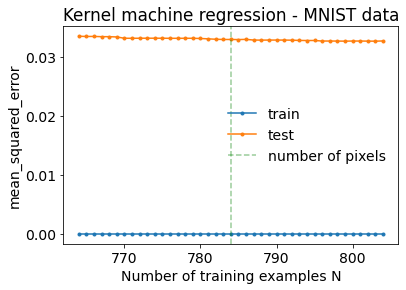

In [14]:
n_trains = np.linspace(764, 804, 41).astype(int)
train_test_loss = my_analytic_kernel_regression.pipeline_v(n_train=n_trains,
                                         loss=default_loss_function)
plt.plot(n_trains, train_test_loss[0], '.-', label='train')
plt.plot(n_trains, train_test_loss[1], '.-', label='test')
# plt.yscale('log')
complete_plot(my_analytic_kernel_regression.dimension, default_title, default_ylabel)
plt.savefig(save_folder + 'basic.pdf', bbox_inches='tight')

## Setting up the pipeline

In [9]:
def analytic_pipeline(kernel=default_kernel,
                      n_train_max=default_n_train_max,
                      pre_shuffle=default_pre_shuffle,
                      kwargs_ker=default_kwargs_ker,
                      loss_function=default_loss_function,):
    my_analytic_kernel_regression = mnist_analytic_kernel_regression(n_train_max=n_train_max,
                                                                     pre_shuffle=pre_shuffle)
    my_analytic_kernel_regression.compute_kernel_train_matrix(kernel, **kwargs_ker)
    n_trains = np.array([0.5, 0.75, 0.9, 0.95, 1., 1.05, 1.1, 1.25])
    n_trains = (my_analytic_kernel_regression.dimension * n_trains).astype(int)
    n_trains = np.trim_zeros(n_trains)
    train_test_loss = my_analytic_kernel_regression.pipeline_v(n_train=n_trains, loss=loss_function)
    return n_trains, *train_test_loss

analytic_pipeline_v = np.vectorize(analytic_pipeline, otypes=[np.ndarray])

## Different random samples

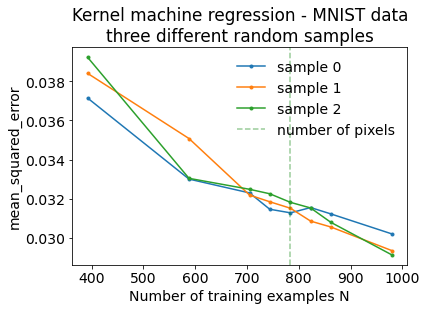

In [10]:
pre_shuffles = [True, True, True]
train_test_loss = analytic_pipeline_v(pre_shuffle=pre_shuffles)

for i, shuffle in enumerate(pre_shuffles):
    plt.plot(train_test_loss[i][0], train_test_loss[i][2], '.-', label=f'sample {i}')
    
complete_plot(my_analytic_kernel_regression.dimension, 
              default_title + '\nthree different random samples', 
              default_ylabel)
plt.savefig(save_folder + 'different_random_samples.pdf', bbox_inches='tight')

## Varying the kernel size 

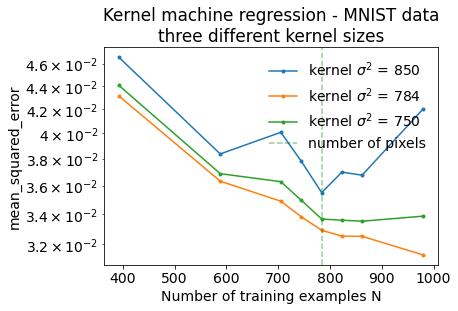

In [11]:
kwargs_ker = [{'sigma2': 850}, {'sigma2': 784}, {'sigma2': 750}]

train_test_loss = analytic_pipeline_v(kwargs_ker=kwargs_ker)

for i, ker in enumerate(kwargs_ker):
    plt.plot(train_test_loss[i][0], train_test_loss[i][2], '.-', label=f"kernel $\sigma^2$ = {ker['sigma2']}")

plt.yscale('log')
complete_plot(my_analytic_kernel_regression.dimension,
              default_title + '\nthree different kernel sizes', 
              default_ylabel)
plt.savefig(save_folder + 'different_kernel_sizes.pdf', bbox_inches='tight')

## Different kernel function

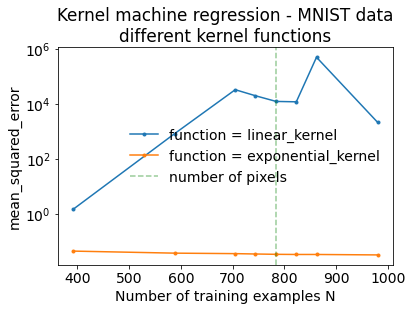

In [12]:
kernel_functions = [
    linear_kernel,
    exponential_kernel,
]

train_test_loss = analytic_pipeline_v(kernel=kernel_functions)

for i, kernel_function in enumerate(kernel_functions):
    plt.plot(train_test_loss[i][0], train_test_loss[i][2], '.-', label=f"function = {kernel_function.__name__}")

plt.yscale('log')
complete_plot(my_analytic_kernel_regression.dimension,
              default_title + '\ndifferent kernel functions', 
              default_ylabel)
plt.savefig(save_folder + 'different_kernel_functions.pdf', bbox_inches='tight')

## Different test loss

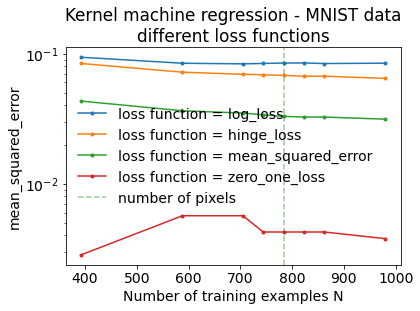

In [13]:
loss_functions = [
    log_loss,
    hinge_loss,
    mean_squared_error,
    zero_one_loss,
]

train_test_loss = analytic_pipeline_v(loss_function=loss_functions)

for i, loss_function in enumerate(loss_functions):
    plt.plot(train_test_loss[i][0], train_test_loss[i][2], '.-', label=f"loss function = {loss_function.__name__}")

plt.yscale('log')
complete_plot(my_analytic_kernel_regression.dimension,
              default_title + '\ndifferent loss functions', 
              default_ylabel)
plt.savefig(save_folder + 'different_loss_functions.pdf', bbox_inches='tight')